In [75]:
import numpy as np
import pandas as pd
import random
import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml
from pathlib import Path
import sys 
import os 
import networkx as nx 

sys.path.append(os.path.dirname(os.getcwd()))
from util.functions import logistic
from structure_generation.path_connection_gen import ProceduralGraphGenerator, StatsUtils, GraphStructureGenerator

In [76]:
graphgen = GraphStructureGenerator(
    structure_name="random_geometric", 
    num_nodes=100, 
    target_mean_degree = 5
)
graph = graphgen.initial_graph
 

In [77]:
import networkx as nx

giant_graph = graph.subgraph(max(nx.connected_components(graph), key=len))
print(graph)
print(giant_graph)

Graph with 100 nodes and 251 edges
Graph with 92 nodes and 240 edges
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
False
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
False
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


100
100


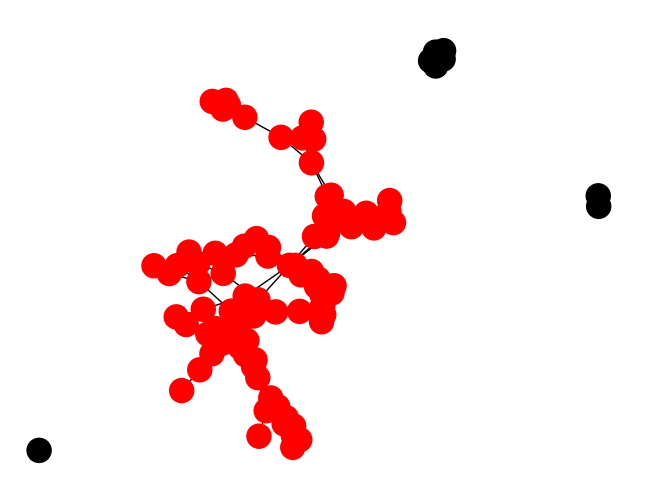

In [78]:
import networkx as nx
map = {True: "red", False: "black"}
colors = [map[giant_graph.has_node(node)] for node in graph]

nx.draw(graph, node_color=colors)